# Preliminary Analysis with Maxfiltered and Preprocessed Data

##### Created AXL 10/10/23
##### Last edited AXL 16/10/23

This jupyter notebook contains some preliminary 'analyses'/visualisation of the COINS-MEG MEG data. The inputted data is the maxfiltered and preprocessed version. Note that this shows example outputs from subject 12, run 1 only.

## Load packages and data

In [1]:
# Load packages

from matplotlib import pyplot as plt
import mne
import osl
import numpy as np
import os
import pandas as pd
from mne.preprocessing import create_eog_epochs

In [5]:
# Read in the data ####
#basedir = '/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/'
basedir = '/ohba/pi/lhunt/datasets/coins-meg_data/'
subj = 17 
run = 1
ifMaxfiltered = True # set to true so that directories point to maxfiltered data

In [11]:
# Set directory paths
procdir = os.path.join(basedir, 'derivatives', 'preprocessed') # directory for the processed data

if ifMaxfiltered == False:
    dir_meg = os.path.join(procdir, f'sub-{subj}', f'run-{run}', 'meg', 'nomax')
else:
    dir_meg = os.path.join(procdir, f'sub-{subj}', f'run-{run}', 'meg', 'max')  # folder where maxfiltered versions live

dir_meg_derivatives = os.path.join(dir_meg, 'derivatives') # for storing derivatives from processing (eg fif files)
dir_meg_plots = os.path.join(dir_meg, 'plots') # for storing plots generated during preprocessing

# Read in the MEG data

# Get the filename for a specific subject and run
if ifMaxfiltered == False:
    preproc_fname = os.path.join(dir_meg_derivatives,
                                 f'sub-{subj}_ses-2-meg_task-coinsmeg_run-{run}_meg_preproc_raw.fif')
else:
    preproc_fname = os.path.join(procdir, 'auto-max', f'sub-{subj}_ses-2-meg_task-coinsmeg_run-{run}_meg_transsss',
                                 f'sub-{subj}_ses-2-meg_task-coinsmeg_run-{run}_meg_transsss_preproc_raw.fif')


print(preproc_fname)
print(dir_meg_derivatives)

clean = mne.io.read_raw_fif(preproc_fname, preload=True)

/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/auto-max/sub-17_ses-2-meg_task-coinsmeg_run-1_meg_transsss/sub-17_ses-2-meg_task-coinsmeg_run-1_meg_transsss_preproc_raw.fif
/Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/sub-17/run-1/meg/max/derivatives
Opening raw data file /Users/amyli/Desktop/LH-lab/coins-meg_meg-analysis/preprocessed/auto-max/sub-17_ses-2-meg_task-coinsmeg_run-1_meg_transsss/sub-17_ses-2-meg_task-coinsmeg_run-1_meg_transsss_preproc_raw.fif...
    Range : 156000 ... 1013999 =    156.000 ...  1013.999 secs
Ready.
Reading 0 ... 857999  =      0.000 ...   857.999 secs...


## Laser Hit vs Miss Analysis

### Defining and Processing Epochs  

2781 events found
Event IDs: [  1   2   3   4   5   6   7  10  20 100 101 102 105]
Not setting metadata
2769 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
<Epochs |  2769 events (good & bad), -0.5 - 1 sec, baseline -0.5 – 0 sec, ~6.4 MB, data not loaded,
 'laserHit': 1471
 'laserMiss': 553
 'keyRight': 173
 'keyLeft': 174
 'keyUp': 22
 'keyDown': 21
 'keyRelease': 355>
Using data from preloaded Raw for 2769 events and 1501 original time points ...
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EO

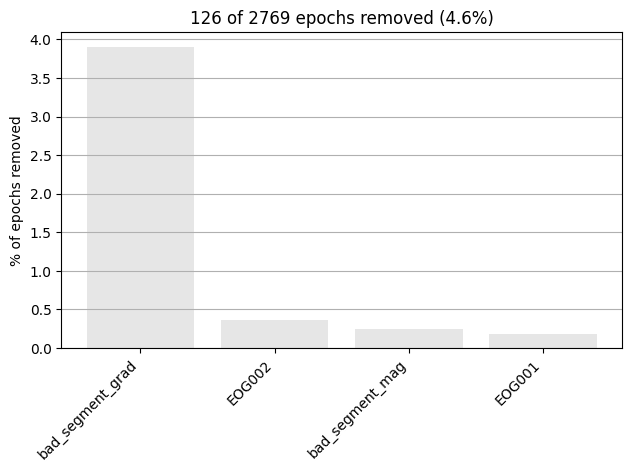

In [13]:
# Define the events 
events = mne.find_events(clean, min_duration=0.005)
event_color = {}
event_dict = {'laserHit': 1, 'laserMiss': 2, 'keyRight': 3, 'keyLeft': 4, 'keyUp': 5, 'keyDown': 6, 'keyRelease': 7}

# Create epochs (-0.5 to 1.0s epoch around event) 
epochs = mne.Epochs(clean, events, tmin=-0.5, tmax=1.0, event_id=event_dict) # -0.5-1.0
print(epochs)

# Remove epochs with particularly high peak-to-peak amplitudes, as this indicates there might still
# be segments in the data with high variance, that we didn't find earlier. We also include EOG peak-to-peak
# amplitude, as high amplitudes indicate saccades.
epochs.drop_bad({"eog": 6e-4, "mag": 4e-11, "grad": 4e-10}) # defines specific thresholds for peak-to-peak amplitudes in different types of channels

# Plot % of epochs dropped
epochs.plot_drop_log();

In [14]:
# Use equalize_event_counts() to randomly sample epochs from each condition to match the number
# of epochs present in the condition w/ the fewest good epochs
conditions = ["laserHit", "laserMiss"]
epochs.equalize_event_counts(conditions)

hit_epochs = epochs["laserHit"]
miss_epochs = epochs["laserMiss"]

Dropped 869 epochs: 36, 40, 41, 42, 45, 46, 51, 56, 57, 58, 61, 62, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 96, 101, 102, 103, 104, 171, 172, 173, 174, 175, 176, 179, 186, 189, 190, 192, 194, 195, 196, 249, 270, 273, 274, 275, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 366, 370, 372, 374, 386, 387, 390, 393, 394, 395, 396, 397, 400, 401, 402, 407, 408, 409, 410, 411, 412, 433, 434, 435, 436, 459, 460, 469, 472, 475, 477, 479, 480, 483, 486, 487, 492, 500, 506, 508, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 534, 535, 536, 539, 540, 541, 542, 543, 544, 545, 546, 547, 550, 585, 587, 589, 592, 593, 594, 595, 600, 601, 602, 603, 820, 825, 828, 831, 856, 859, 860, 861, 878, 879, 880, 895, 902, 903, 905, 907, 908, 909, 910, 911, 912, 913, 918, 919, 920, 921, 926, 928, 938, 963, 964, 969, 976, 977, 978, 981, 982, 983, 984, 985, 986, 987, 988, 989, 992, 1049, 1050, 1051, 1052, 1073, 1076, 1078, 1080, 1081, 1084, 1085, 1086, 1087, 1088, 1090, 1097, 1099, 1100, 1101, 1102, 1103

### Visualising Evoked Potential for Laser Hits

First visualise ERFs for all channels, for both magnetometers and gradiometers.

No projector specified for this dataset. Please consider the method self.add_proj.


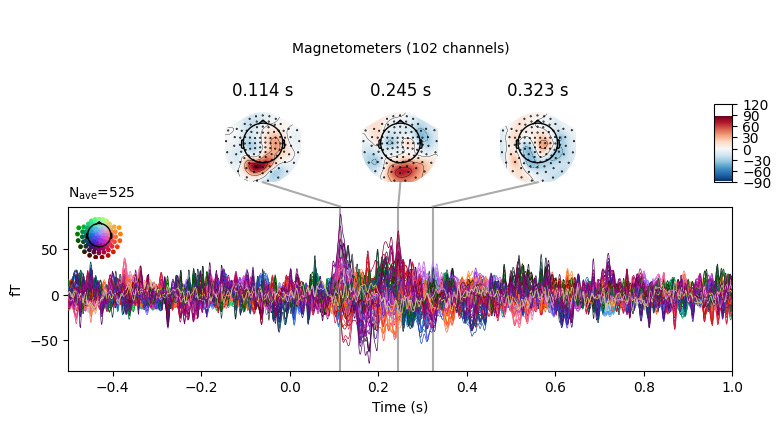

No projector specified for this dataset. Please consider the method self.add_proj.


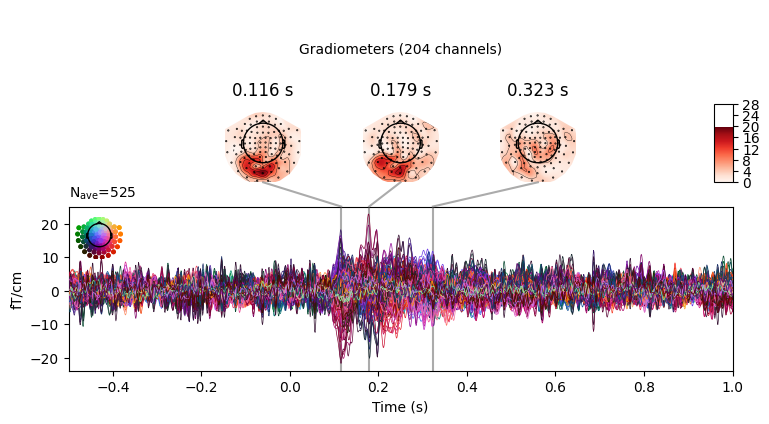

In [15]:
# Compute average evoked responses for hit and miss epochs

## hit ERFs
evoked_hit = hit_epochs.average()

evoked_hit.plot_joint(picks='mag')

evoked_hit.plot_joint(picks='grad');


Visualise ERFs for centroparietal channels only (magnetometers).

No projector specified for this dataset. Please consider the method self.add_proj.


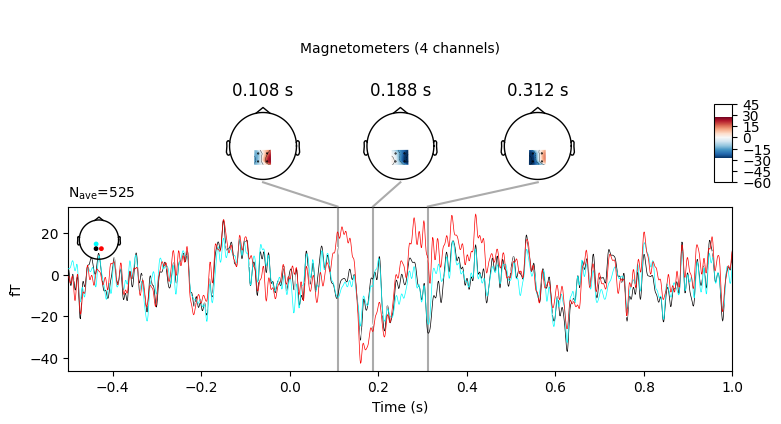

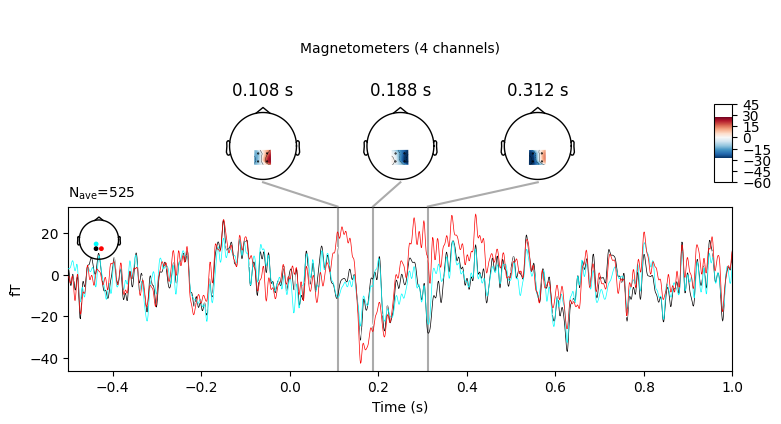

In [16]:
### centroparietal only
roi_cp = ['MEG0731', 'MEG0741', 'MEG1831', 'MEG2241'] # define roi over centroparietal sensors

evoked_hit.plot_joint(picks=roi_cp)

### Visualising Evoked Potential for Laser Misses

First visualise ERFs for all channels, for both magnetometers and gradiometers.

No projector specified for this dataset. Please consider the method self.add_proj.


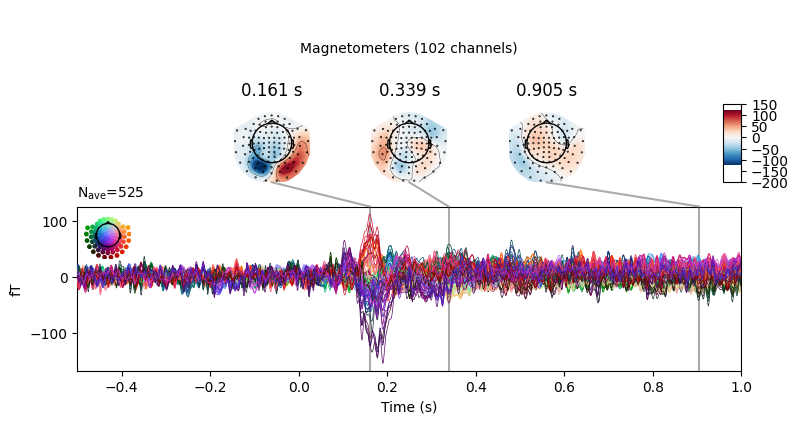

No projector specified for this dataset. Please consider the method self.add_proj.


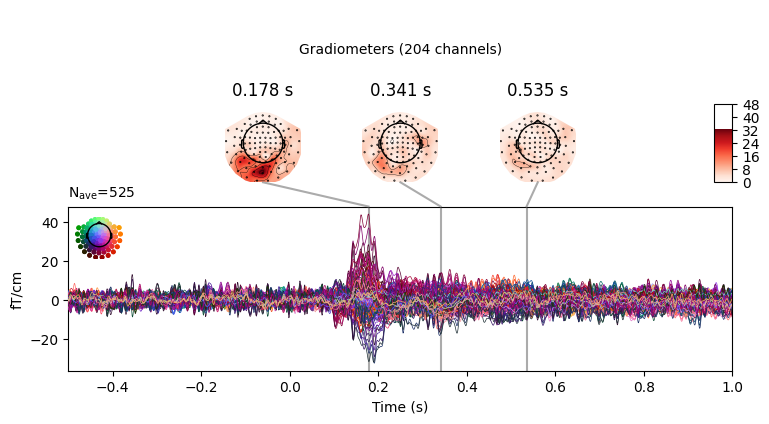

In [17]:
## miss ERFs
evoked_miss = miss_epochs.average()

evoked_miss.plot_joint(picks='mag')

evoked_miss.plot_joint(picks='grad');


Then visualise for only centroparietal channels (magnenometers).

No projector specified for this dataset. Please consider the method self.add_proj.


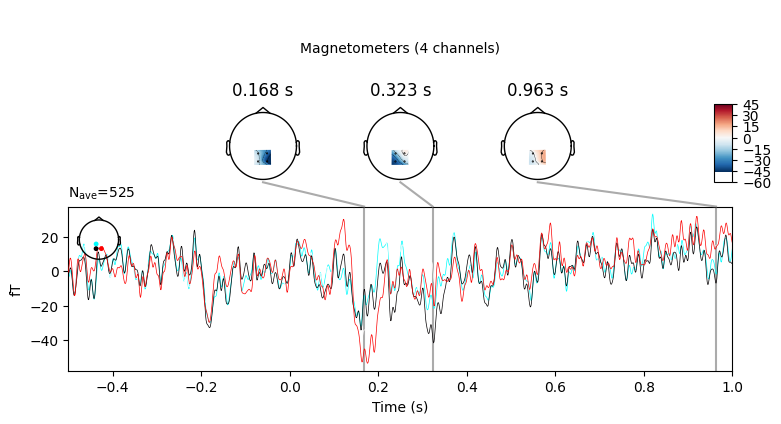

In [18]:
### centroparietal only
evoked_miss.plot_joint(picks=roi_cp);


### Comparing Laser Hits vs Misses

First compare global field power for hits vs. misses; for both magnetometers and gradiometers.

combining channels using "gfp"
combining channels using "gfp"


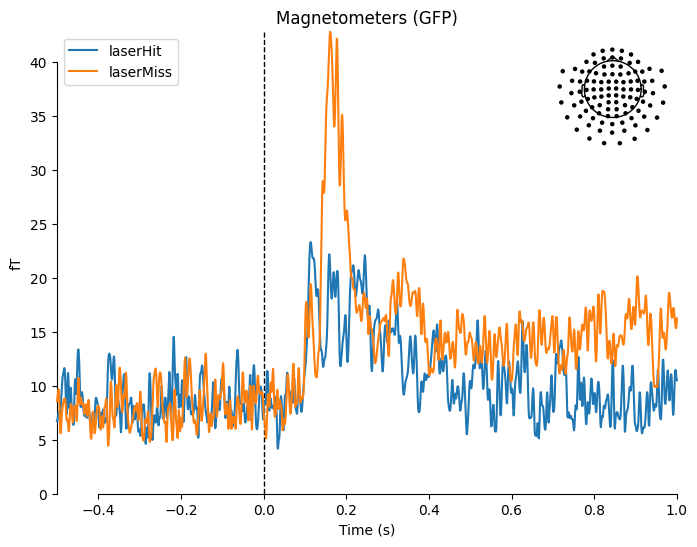

combining channels using "gfp"
combining channels using "gfp"


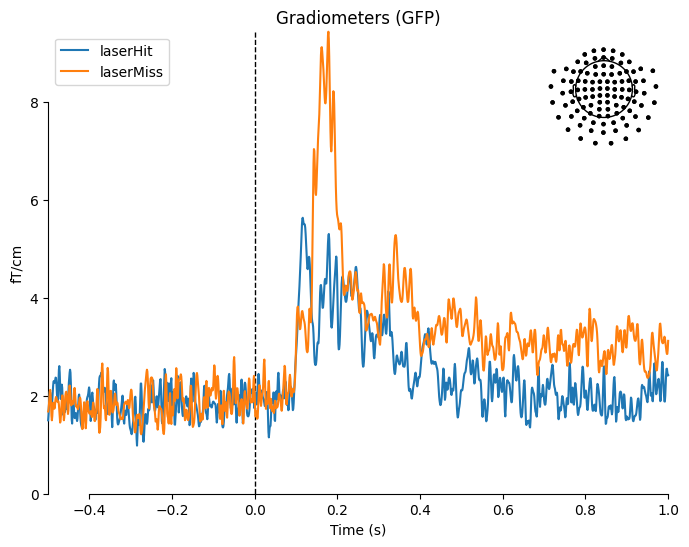

[<Figure size 800x600 with 2 Axes>]

In [19]:
## Compare hit vs miss evokeds, global field power

mne.viz.plot_compare_evokeds([evoked_hit, evoked_miss], picks='mag',
                             show_sensors='upper right')

mne.viz.plot_compare_evokeds([evoked_hit, evoked_miss], picks='grad',
                             show_sensors='upper right')

#### Plot difference waveform for laser hits vs misses

First for all sensors...

No projector specified for this dataset. Please consider the method self.add_proj.


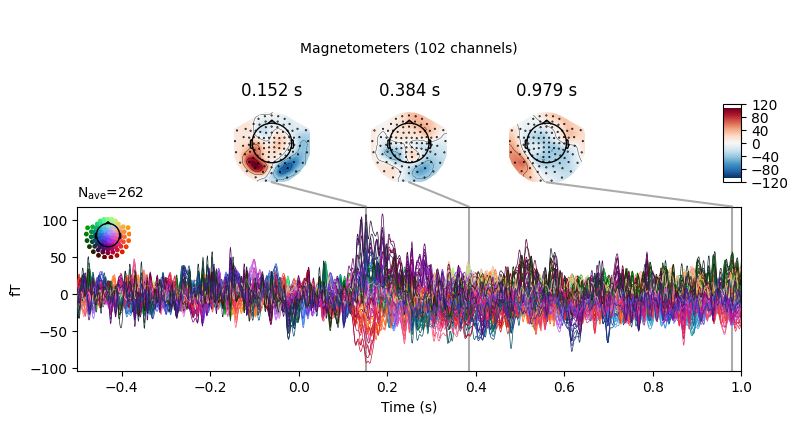

No projector specified for this dataset. Please consider the method self.add_proj.


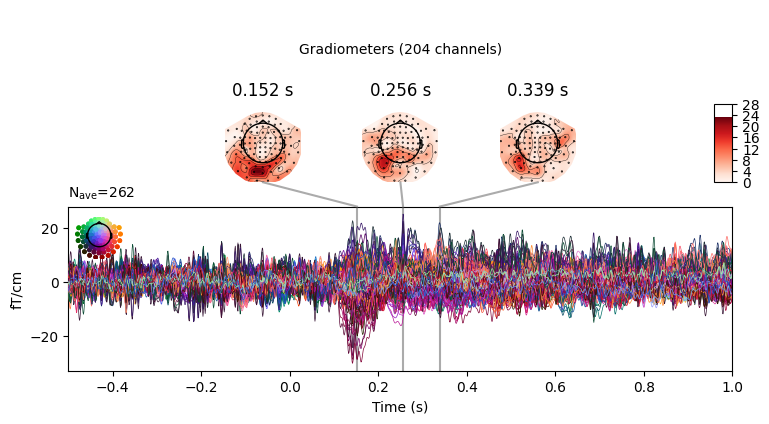

In [20]:
## difference waveform hit-miss

### all sensors and topography
evokeds_diff_hitVsMiss = mne.combine_evoked([evoked_hit, evoked_miss], weights=[1, -1])
evokeds_diff_hitVsMiss.plot_joint(picks='mag')
evokeds_diff_hitVsMiss.plot_joint(picks='grad');

Then for centroparietal magnetometers only.

combining channels using "mean"


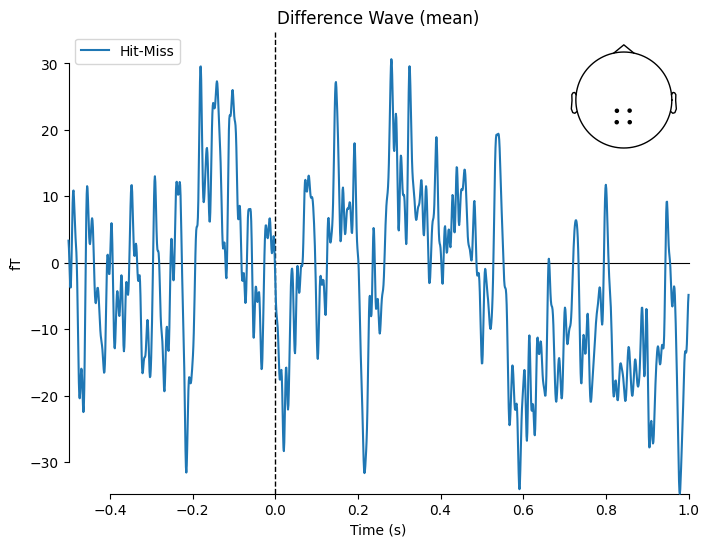

[<Figure size 800x600 with 2 Axes>]

In [21]:
### cp sensors only
mne.viz.plot_compare_evokeds({'Hit-Miss':evokeds_diff_hitVsMiss},
                             picks=roi_cp, show_sensors='upper right',
                             combine='mean',
                             title='Difference Wave')

## Movement Keys (Left vs. Right) Analysis

### Defining and Processing Epochs

Not setting metadata
2769 matching events found
Setting baseline interval to [-3.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
<Epochs |  2769 events (good & bad), -3 - 1 sec, baseline -3 – 0 sec, ~6.4 MB, data not loaded,
 'laserHit': 1471
 'laserMiss': 553
 'keyRight': 173
 'keyLeft': 174
 'keyUp': 22
 'keyDown': 21
 'keyRelease': 355>
Using data from preloaded Raw for 2769 events and 4001 original time points ...
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG001', 'EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG : ['EOG002']
    Rejecting  epoch based on EOG

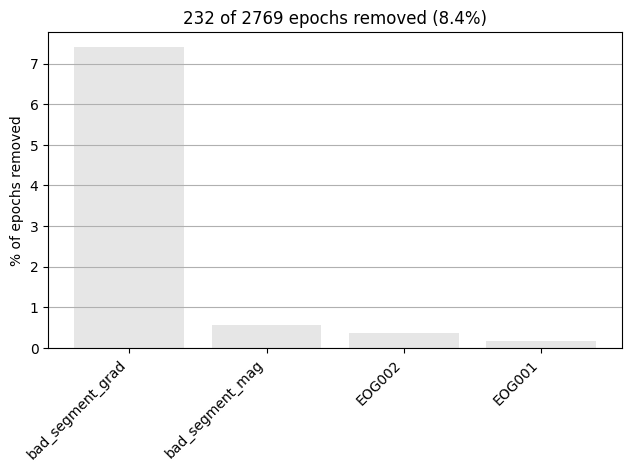

Dropped 7 epochs: 5, 1034, 1066, 1086, 1104, 1197, 1613


In [22]:
# Create epochs for movement keys (left vs right)

epochs = mne.Epochs(clean, events, tmin=-3.0, tmax=1.0, event_id=event_dict) # different epoch times now compared to hit/miss
print(epochs)

# Remove epochs with particularly high peak-to-peak amplitudes, as we did for hit/miss epochs

epochs.drop_bad({"eog": 6e-4, "mag": 4e-11, "grad": 4e-10}) # defines specific thresholds for peak-to-peak amplitudes in different types of channels
epochs.plot_drop_log();

# use equalize_event_counts first to randomly sample epochs from each condition to match the number
# of epochs present in the condition w/ the fewest good epochs
conditions = ["keyLeft", "keyRight"]
epochs.equalize_event_counts(conditions)

left_epochs = epochs["keyLeft"]
right_epochs = epochs["keyRight"]

### Visualising Evoked Potentials for keyLeft

No projector specified for this dataset. Please consider the method self.add_proj.


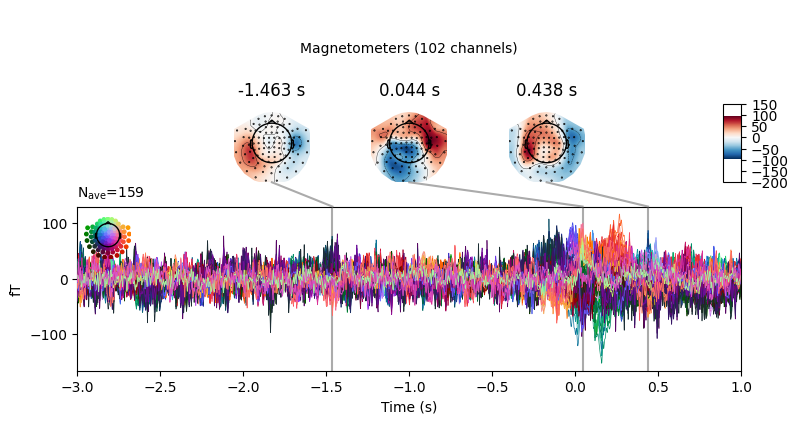

No projector specified for this dataset. Please consider the method self.add_proj.


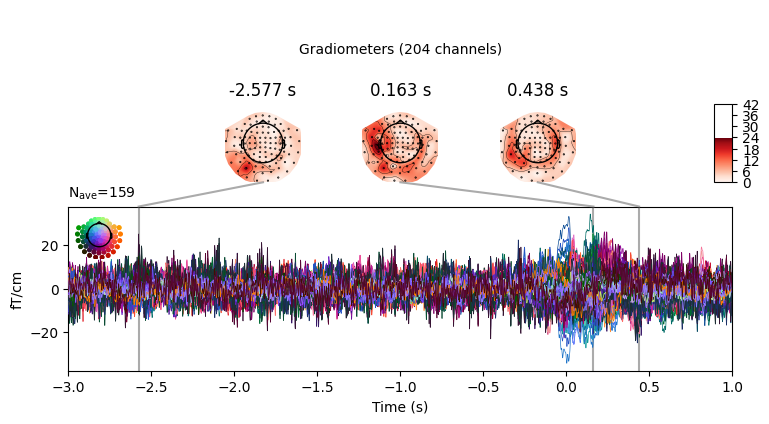

In [23]:
# Compute average evoked responses for left and right epochs

evoked_left = left_epochs.average()
evoked_left.plot_joint(picks='mag')

evoked_left.plot_joint(picks='grad');


#### Visualising ERFs for centroparietal channels only (mag)

No projector specified for this dataset. Please consider the method self.add_proj.


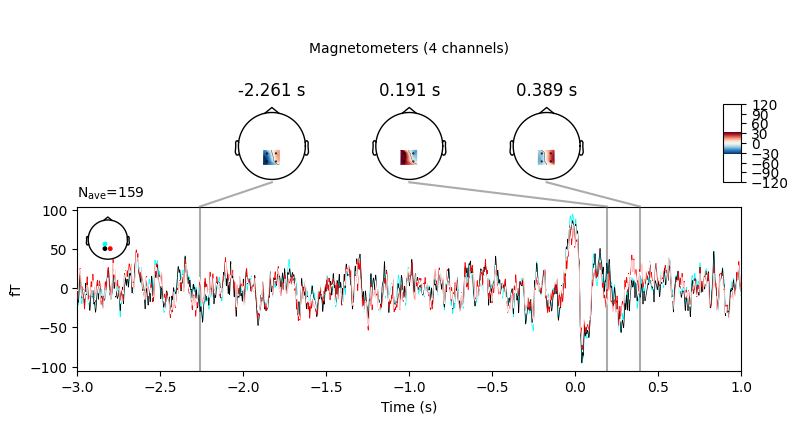

In [24]:
evoked_left.plot_joint(picks=roi_cp);

### Visualising Evoked Potentials for keyRight

No projector specified for this dataset. Please consider the method self.add_proj.


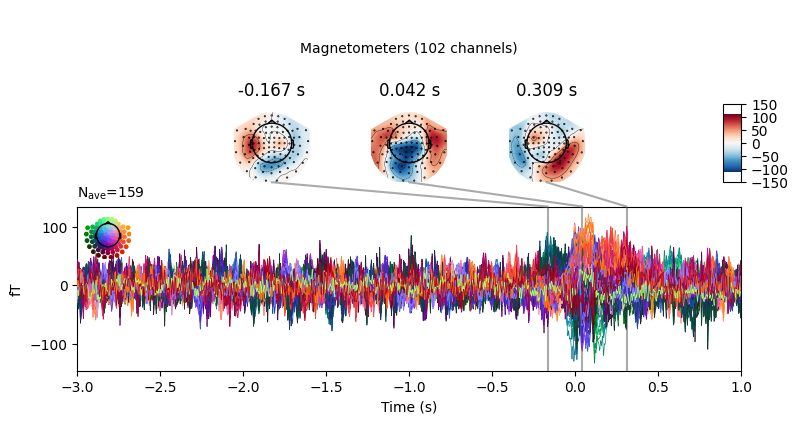

No projector specified for this dataset. Please consider the method self.add_proj.


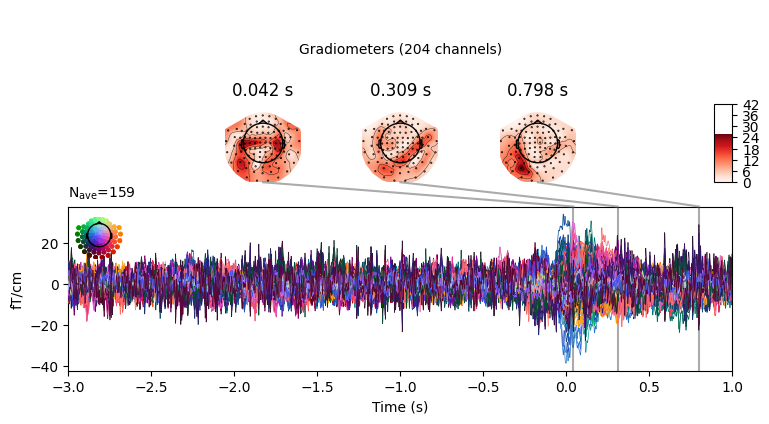

In [25]:

evoked_right = right_epochs.average()

evoked_right.plot_joint(picks='mag')

evoked_right.plot_joint(picks='grad');

#### Visualising ERFs for centroparietal channels only (mag)

No projector specified for this dataset. Please consider the method self.add_proj.


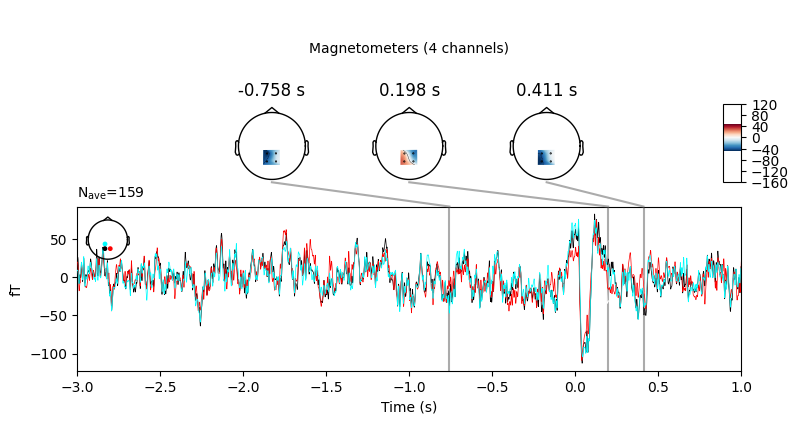

In [26]:
evoked_right.plot_joint(picks=roi_cp);

### Comparing KeyLeft vs Right

First compare global field power for keyLeft vs. Right; for both magnetometers and gradiometers.

combining channels using "gfp"
combining channels using "gfp"


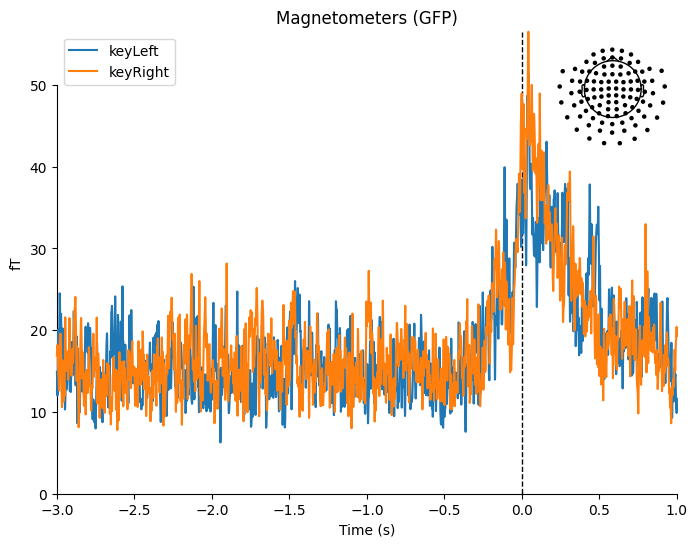

combining channels using "gfp"
combining channels using "gfp"


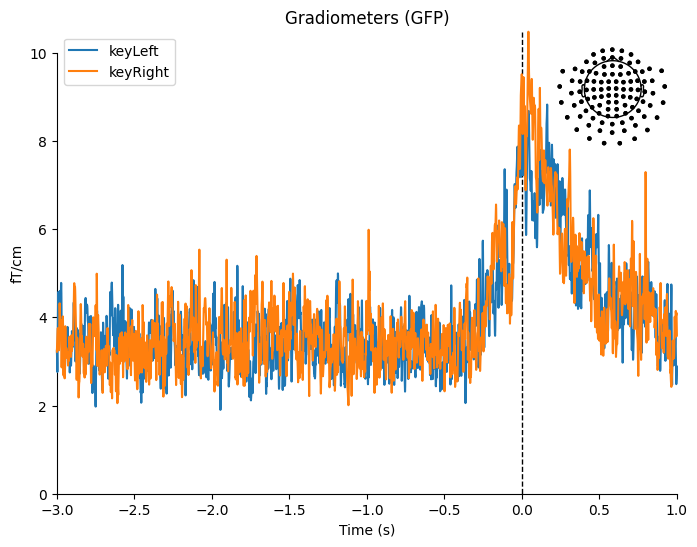

In [27]:
mne.viz.plot_compare_evokeds([evoked_left, evoked_right], picks='mag',
                             show_sensors='upper right')

mne.viz.plot_compare_evokeds([evoked_left, evoked_right], picks='grad',
                             show_sensors='upper right');

No projector specified for this dataset. Please consider the method self.add_proj.


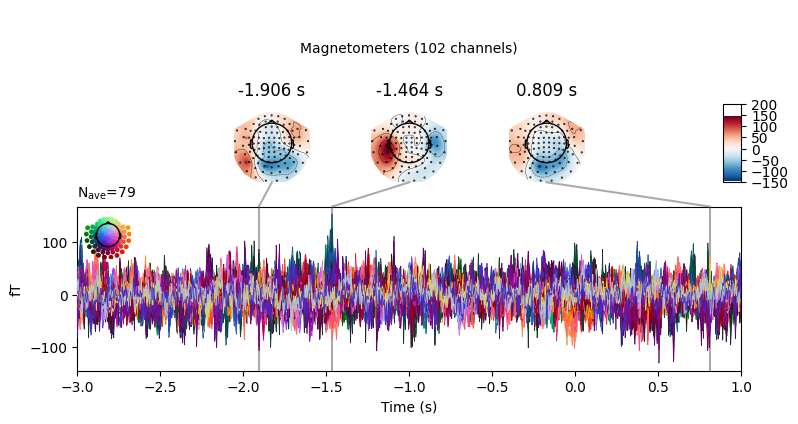

No projector specified for this dataset. Please consider the method self.add_proj.


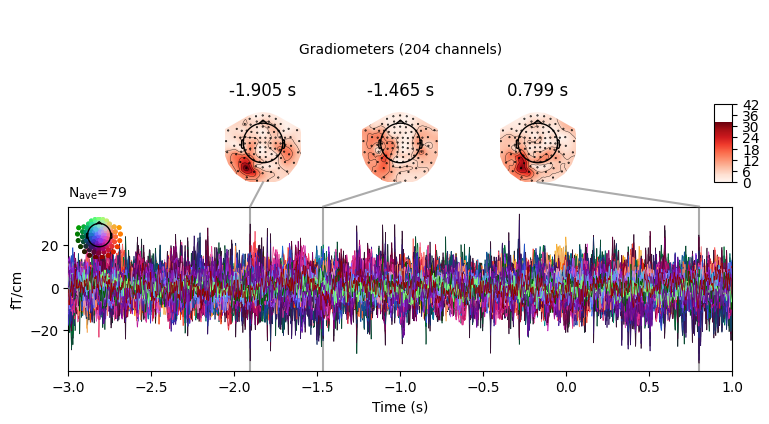

In [28]:
evokeds_diff_leftVsRight = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])
evokeds_diff_leftVsRight.plot_joint(picks='mag')

evokeds_diff_leftVsRight.plot_joint(picks='grad');